In [1]:
import os 
from dotenv import load_dotenv

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.7,
)

outline_prompt = ChatPromptTemplate.from_template(
    "Generate a detailed outline for a blog on the topic - {topic}"
)

content_prompt = ChatPromptTemplate.from_template(
    "Write a detailed blog on the title - {topic} using the following outline \n {outline}"
)

outline_chain = outline_prompt | llm
content_chain = content_prompt | llm

In [4]:
class State(TypedDict):
    topic:str
    outline:str
    content:str

In [5]:
def generate_outline(state: State) -> State:
    state["outline"] = outline_chain.invoke({"topic":state["topic"]})
    return state

def generate_content(state: State) -> State:
    state['content'] = content_chain.invoke({"topic":state["topic"], "outline":state["outline"]})
    return state

In [6]:
graph = StateGraph(State)

graph.add_node("generate_outline", generate_outline)
graph.add_node("generate_content", generate_content)

graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_content")
graph.add_edge("generate_content", END)

workflow = graph.compile()

In [9]:
response = workflow.invoke({'topic':'Rise of AI in India'})
print(response["content"].content)

## The AI Revolution is Here: How Artificial Intelligence is Reshaping India

**I. Introduction**

Imagine a future where farmers optimize crop yields with pinpoint accuracy, doctors diagnose diseases with unparalleled speed, and financial institutions detect fraud before it even happens. This isn't science fiction; it's the promise of Artificial Intelligence (AI) unfolding in India today. With investments in AI soaring to unprecedented levels, exceeding \$10 billion in the last year alone, India is rapidly emerging as a global AI hub. This blog explores the transformative power of AI in India, highlighting both the immense opportunities and the critical challenges that lie ahead. We'll delve into India's readiness for AI, examine its applications across key sectors, address the associated concerns, and finally, look towards the exciting future of AI in the country.

**II. Setting the Stage: India's Readiness for AI**

India possesses a unique combination of factors that make it ripe f

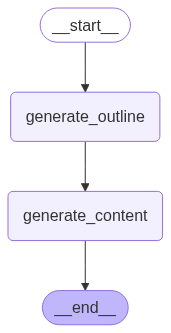

In [8]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())